In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd

(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

xtrain.shape,ytrain.shape
ytrain,ytest=ytrain.flatten(),ytest.flatten()

xtrain=xtrain/255.0
xtest=xtest/255.0

BATCH_SIZE=64
EPOCHS=30

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,GlobalMaxPooling2D,Conv2D,AveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler

model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=xtrain[0].shape,padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2)))
model.add(Dropout(0.4))

model.add(GlobalMaxPooling2D())
model.add(Dropout(0.4))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                        

2022-02-24 02:43:37.180032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 02:43:37.186547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 02:43:37.186925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 02:43:37.187790: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
def scheduler(epoch,lr):
    if epoch<6:
        lr=0.001
    elif 6<=epoch<15:
        lr=0.0004
    elif 15<=epoch<23:
        lr=0.00006
    
    else :
        lr=0.00001
        
    return lr

lr_scheduler=LearningRateScheduler(scheduler)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

model.fit(xtrain,ytrain,
          epochs=EPOCHS,
          validation_data=(xtest,ytest),
          batch_size=BATCH_SIZE,
          steps_per_epoch=int(len(xtrain)/BATCH_SIZE),
          callbacks=[lr_scheduler])

2022-02-24 02:43:38.215898: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-02-24 02:43:38.587802: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/30


2022-02-24 02:43:40.101265: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


781/781 [==============================] - 19s 20ms/step - loss: 1.5568 - accuracy: 0.4417 - val_loss: 1.4810 - val_accuracy: 0.4709 - lr: 0.0010
Epoch 2/30
781/781 [==============================] - 16s 20ms/step - loss: 1.0752 - accuracy: 0.6124 - val_loss: 0.9364 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 3/30
781/781 [==============================] - 16s 20ms/step - loss: 0.8874 - accuracy: 0.6841 - val_loss: 0.8046 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 4/30
781/781 [==============================] - 16s 20ms/step - loss: 0.7676 - accuracy: 0.7331 - val_loss: 0.8098 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 5/30
781/781 [==============================] - 16s 20ms/step - loss: 0.6874 - accuracy: 0.7624 - val_loss: 0.7468 - val_accuracy: 0.7507 - lr: 0.0010
Epoch 6/30
781/781 [==============================] - 16s 20ms/step - loss: 0.6301 - accuracy: 0.7829 - val_loss: 0.5526 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/30
781/781 [==============================] - 17s 22ms/step -

<AxesSubplot:>

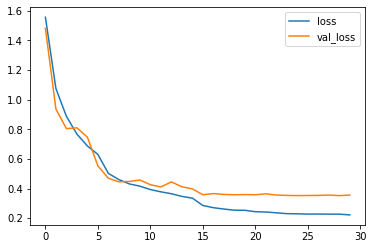

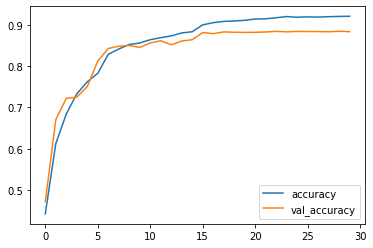

In [4]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

In [ ]:
pred=model.predict(xtest)

In [ ]:
pred=[np.argmax(pred[i]) for i in range(len(pred))]

In [ ]:
classes=['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sb.heatmap(confusion_matrix(ytest,pred),annot=True,cmap='Blues',fmt='d',xticklabels=classes,yticklabels=classes)
plt.xlabel('actual')
plt.ylabel('predicted')